In [1]:
import sys
sys.path.append('../scripts')

from time_series_models import TimeSeriesForecasting

Load the Data

In [2]:
file_path = '../data/TSLA_processed.csv'
ts_forecasting = TimeSeriesForecasting(file_path)

Columns before renaming: Index(['Ticker', 'TSLA', 'TSLA.1', 'TSLA.2', 'TSLA.3', 'TSLA.4', 'TSLA.5',
       'Unnamed: 7'],
      dtype='object')


Split the Data into Training and Testing Sets

In [3]:
ts_forecasting.split_data()

Data split into train and test sets.


Train and Evaluate ARIMA Model

In [4]:
ts_forecasting.train_arima()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11807.105, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11884.552, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11832.018, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11821.288, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11883.249, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11817.399, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11816.584, Time=0.43 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=11817.506, Time=0.82 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=11814.148, Time=1.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11817.551, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11818.682, Time=0.87 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11815.761, Time=1.04 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.32 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=11805.719, Time=0.79 sec
 ARIMA(1,1,2)(0,0,0)[0]  

Train and Evaluate SARIMA Model

In [5]:
ts_forecasting.train_sarima()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=11799.591, Time=6.38 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=11884.552, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=11827.898, Time=0.75 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=11819.065, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=11883.249, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=11805.177, Time=4.87 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=11804.257, Time=5.23 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=11784.116, Time=17.84 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=11784.404, Time=13.65 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=11788.030, Time=12.96 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=11785.027, Time=9.81 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=11796.931, Time=4.51 sec
 ARIMA(2,1,1)(2,0,1)[12] intercept   : AIC=11796.561, Time=3.72 sec
 ARIMA(3,1,2)(2,0,1)[12] intercept   : AIC=11798.356, Time=9.00 sec
 A

Train and Evaluate LSTM Model

In [6]:
ts_forecasting.build_lstm()

Epoch 1/20
62/62 [==============================] - 9s 11ms/step - loss: 15514.7812
Epoch 2/20
62/62 [==============================] - 0s 6ms/step - loss: 92.0966
Epoch 3/20
62/62 [==============================] - 0s 6ms/step - loss: 77.1975
Epoch 4/20
62/62 [==============================] - 0s 6ms/step - loss: 50.5329
Epoch 5/20
62/62 [==============================] - 0s 6ms/step - loss: 39.2029
Epoch 6/20
62/62 [==============================] - 0s 6ms/step - loss: 46.8600
Epoch 7/20
62/62 [==============================] - 0s 6ms/step - loss: 52.7977
Epoch 8/20
62/62 [==============================] - 0s 7ms/step - loss: 41.3467
Epoch 9/20
62/62 [==============================] - 0s 6ms/step - loss: 60.1637
Epoch 10/20
62/62 [==============================] - 0s 7ms/step - loss: 50.4078
Epoch 11/20
62/62 [==============================] - 0s 6ms/step - loss: 38.7499
Epoch 12/20
62/62 [==============================] - 0s 6ms/step - loss: 37.2549
Epoch 13/20
62/62 [==============

Plot the Actual vs Predicted Values

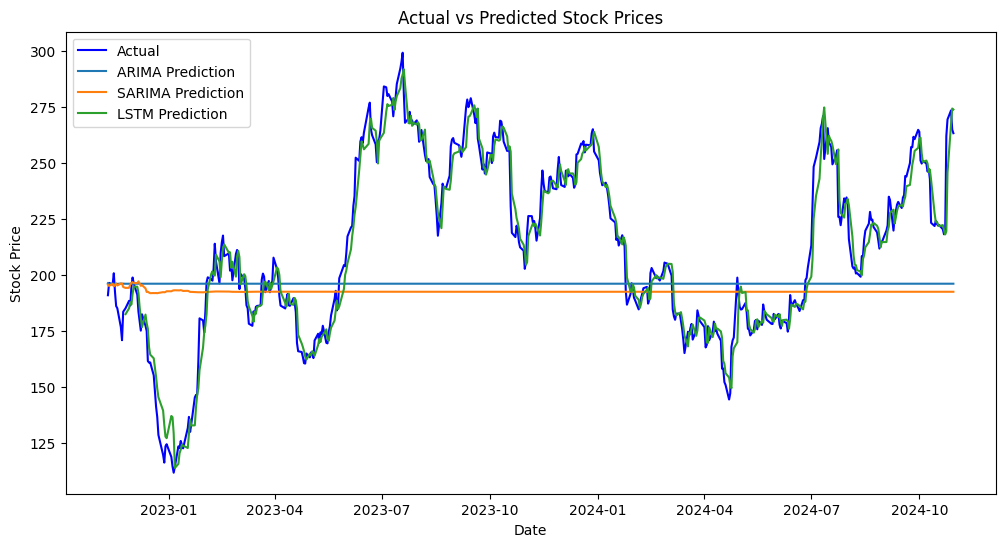

In [7]:
ts_forecasting.plot_results()

Summary of Results

In [8]:
for model_name, predictions in ts_forecasting.predictions.items():
    mae, rmse, mape = ts_forecasting.evaluate(ts_forecasting.test['Close'], predictions)
    
    print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")

ARIMA - MAE: 34.16, RMSE: 42.17, MAPE: 15.96%
SARIMA - MAE: 35.08, RMSE: 43.69, MAPE: 16.14%
LSTM - MAE: 17.71, RMSE: 22.42, MAPE: 8.73%
